In [1]:
import pandas as pd
from tqdm import tqdm

train = pd.read_csv("ratings_train.txt",
                    header=0,
                    delimiter="\t",
                    quoting=3)
test = pd.read_csv("ratings_test.txt",
                    header=0,
                    delimiter="\t",
                    quoting=3)

In [2]:
print("train %s, test %s" %
      (train.shape, test.shape))

print(train.isnull().sum())
print(test.isnull().sum())

train.dropna(axis=0, how='any', inplace=True)
test.dropna(axis=0, how='any', inplace=True)

print(train.isnull().sum())
print(test.isnull().sum())

print("train %s, test %s" %
      (train.shape, test.shape))

train (150000, 3), test (50000, 3)
id          0
document    5
label       0
dtype: int64
id          0
document    3
label       0
dtype: int64
id          0
document    0
label       0
dtype: int64
id          0
document    0
label       0
dtype: int64
train (149995, 3), test (49997, 3)


In [3]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

def tokenize(doc):
    # norm, stem은 optional
    try:
        return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]
    except:
        print(doc)

train_docs = [(tokenize(row[1]), row[2]) for row in tqdm(train.values)]
test_docs = [(tokenize(row[1]), row[2]) for row in tqdm(test.values)]

100%|██████████████████████████████████████████████████████████████████████████| 49997/49997 [00:42<00:00, 1176.92it/s]


In [4]:
train_docs

[(['아/Exclamation',
   '더빙/Noun',
   '../Punctuation',
   '진짜/Noun',
   '짜증/Noun',
   '나다/Verb',
   '목소리/Noun'],
  0),
 (['흠/Noun',
   '.../Punctuation',
   '포스터/Noun',
   '보고/Noun',
   '초딩/Noun',
   '영화/Noun',
   '줄/Noun',
   '..../Punctuation',
   '오버/Noun',
   '연기/Noun',
   '조차/Josa',
   '가볍다/Adjective',
   '않다/Verb'],
  1),
 (['너무/Noun',
   '재/Noun',
   '밓었/Noun',
   '다/Josa',
   '그래서/Adverb',
   '보다/Verb',
   '추천/Noun',
   '하다/Verb'],
  0),
 (['교도소/Noun',
   '이야기/Noun',
   '구먼/Noun',
   '../Punctuation',
   '솔직하다/Adjective',
   '재미/Noun',
   '는/Josa',
   '없다/Adjective',
   '../Punctuation',
   '평점/Noun',
   '조정/Noun'],
  0),
 (['사이몬페그/Noun',
   '의/Josa',
   '익살/Noun',
   '스런/Josa',
   '연기/Noun',
   '가/Josa',
   '돋보이다/Verb',
   '영화/Noun',
   '!/Punctuation',
   '스파이더맨/Noun',
   '에서/Josa',
   '늙다/Verb',
   '보이다/Verb',
   '하다/Verb',
   '크다/Verb',
   '스틴/Noun',
   '던스트/Noun',
   '가/Josa',
   '너무나/Noun',
   '도/Josa',
   '이쁘다/Adjective',
   '보이다/Verb'],
  1),
 (['막/Noun',
   '걸음/Noun',


In [5]:
tokens = [t for d in tqdm(train_docs) for t in d[0]]
print(len(tokens))

100%|█████████████████████████████████████████████████████████████████████| 149995/149995 [00:00<00:00, 1066517.19it/s]


2194536


In [6]:
import nltk
text = nltk.Text(tokens, name='NMSC')
print(text)

<Text: NMSC>


In [7]:
print(len(text.tokens))
print(len(set(text.tokens)))
print(text.vocab().most_common(30))

2194536
48765
[('./Punctuation', 68630), ('영화/Noun', 51365), ('하다/Verb', 50281), ('이/Josa', 39123), ('보다/Verb', 34764), ('의/Josa', 30480), ('../Punctuation', 29055), ('에/Josa', 27108), ('가/Josa', 26696), ('을/Josa', 23481), ('도/Josa', 23116), ('.../Punctuation', 22795), ('은/Josa', 18559), ('들/Suffix', 18034), (',/Punctuation', 17659), ('는/Josa', 17537), ('없다/Adjective', 16390), ('를/Josa', 15697), ('있다/Adjective', 12518), ('좋다/Adjective', 12359), ('너무/Noun', 11621), ('되다/Verb', 11516), ('이/Determiner', 11237), ('?/Punctuation', 11054), ('재밌다/Adjective', 10411), ('정말/Noun', 9656), ('ㅋㅋ/KoreanParticle', 8982), ('다/Josa', 8867), ('것/Noun', 8698), ('이/Noun', 8511)]


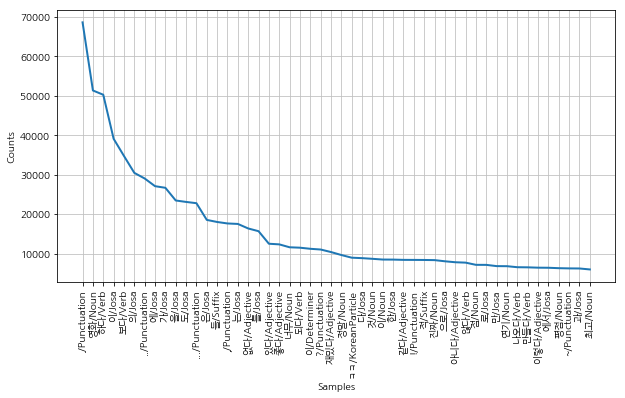

In [8]:
from matplotlib import font_manager, rc
font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

text.plot(50)

In [9]:
text.collocations()

이/Determiner 것/Noun; 적/Suffix 인/Josa; 이/Determiner 거/Noun; 안/Noun
되다/Verb; 것/Noun 은/Josa; 10/Number 점/Noun; 배우/Noun 들/Suffix; 수/Noun
있다/Adjective; 이/Noun 게/Josa; 내/Noun 가/Josa; 최고/Noun 의/Josa; 네/Suffix
요/Josa; 이/Noun 영화/Noun; 끝/Noun 까지/Josa; 들/Suffix 이/Josa; 봐/Noun
도/Josa; 때문/Noun 에/Josa; 적/Suffix 으로/Josa; 사람/Noun 들/Suffix; 영화/Noun
를/Josa


In [10]:
selected_words = [f[0] for f in text.vocab().most_common(2000)]
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}
# 시간 단축을 위한 꼼수로 training corpus의 일부만 사용할 수 있음
train_docs_sample = train_docs[:10000]
train_xy = [(term_exists(d), c) for d, c in tqdm(train_docs_sample)]
test_xy = [(term_exists(d), c) for d, c in tqdm(test_docs)]

100%|███████████████████████████████████████████████████████████████████████████| 49997/49997 [01:33<00:00, 536.79it/s]


In [11]:
term_exists(train_docs[0][0])

{'exists(./Punctuation)': False,
 'exists(영화/Noun)': False,
 'exists(하다/Verb)': False,
 'exists(이/Josa)': False,
 'exists(보다/Verb)': False,
 'exists(의/Josa)': False,
 'exists(../Punctuation)': True,
 'exists(에/Josa)': False,
 'exists(가/Josa)': False,
 'exists(을/Josa)': False,
 'exists(도/Josa)': False,
 'exists(.../Punctuation)': False,
 'exists(은/Josa)': False,
 'exists(들/Suffix)': False,
 'exists(,/Punctuation)': False,
 'exists(는/Josa)': False,
 'exists(없다/Adjective)': False,
 'exists(를/Josa)': False,
 'exists(있다/Adjective)': False,
 'exists(좋다/Adjective)': False,
 'exists(너무/Noun)': False,
 'exists(되다/Verb)': False,
 'exists(이/Determiner)': False,
 'exists(?/Punctuation)': False,
 'exists(재밌다/Adjective)': False,
 'exists(정말/Noun)': False,
 'exists(ㅋㅋ/KoreanParticle)': False,
 'exists(다/Josa)': False,
 'exists(것/Noun)': False,
 'exists(이/Noun)': False,
 'exists(한/Josa)': False,
 'exists(같다/Adjective)': False,
 'exists(!/Punctuation)': False,
 'exists(적/Suffix)': False,
 'exists(진짜/No

In [12]:
# 초간단함
classifier = nltk.NaiveBayesClassifier.train(train_xy)
print(nltk.classify.accuracy(classifier, test_xy))
# => 0.80418
classifier.show_most_informative_features(10)

0.8041682500950057
Most Informative Features
         exists(수작/Noun) = True                1 : 0      =     38.0 : 1.0
         exists(최악/Noun) = True                0 : 1      =     30.1 : 1.0
       exists(♥/Foreign) = True                1 : 0      =     24.5 : 1.0
         exists(노잼/Noun) = True                0 : 1      =     22.1 : 1.0
         exists(낭비/Noun) = True                0 : 1      =     19.5 : 1.0
        exists(쓰레기/Noun) = True                0 : 1      =     19.4 : 1.0
         exists(여운/Noun) = True                1 : 0      =     18.9 : 1.0
        exists(발연기/Noun) = True                0 : 1      =     16.9 : 1.0
          exists(굿/Noun) = True                1 : 0      =     16.9 : 1.0
        exists(최고다/Noun) = True                1 : 0      =     15.9 : 1.0


In [13]:
from collections import namedtuple
TaggedDocument = namedtuple('TaggedDocument', 'words tags')
# 여기서는 15만개 training documents 전부 사용함
tagged_train_docs = [TaggedDocument(d, [c]) for d, c in tqdm(train_docs)]
tagged_test_docs = [TaggedDocument(d, [c]) for d, c in tqdm(test_docs)]

100%|████████████████████████████████████████████████████████████████████████| 49997/49997 [00:00<00:00, 639891.30it/s]


In [14]:
# 1. UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
# http://daewonyoon.tistory.com/240
# 2. ValueError: You must specify either total_examples or total_words, for proper job parameters updationand progress calculations. The usual value is total_examples=model.corpus_count.
# 3. DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
from gensim.models import doc2vec
# 사전 구축
doc_vectorizer = doc2vec.Doc2Vec(vector_size=300, window=10, min_count=5, workers=11, alpha=0.025, min_alpha=0.023, seed=1234, epochs=10)
doc_vectorizer.build_vocab(tagged_train_docs)
doc_vectorizer.train(tagged_train_docs, epochs=doc_vectorizer.epochs, total_examples=doc_vectorizer.corpus_count)

# To save
doc_vectorizer.save('doc2vec_nsmc.model')

C:\Users\deera\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [15]:
print(doc_vectorizer.wv.most_similar('공포/Noun'))

[('공포영화/Noun', 0.5339546799659729), ('스릴러/Noun', 0.5142008662223816), ('미스터리/Noun', 0.5078734159469604), ('서스펜스/Noun', 0.43593716621398926), ('호러/Noun', 0.43546515703201294), ('공포물/Noun', 0.41218090057373047), ('귀신/Noun', 0.40097883343696594), ('미스테리/Noun', 0.39496350288391113), ('호러영화/Noun', 0.37969350814819336), ('SF/Alpha', 0.37460654973983765)]


In [16]:
print(doc_vectorizer.wv.most_similar('ㅋㅋ/KoreanParticle'))

[('ㅋㅋㄱ/KoreanParticle', 0.365756094455719), ('개잼/Noun', 0.35256192088127136), ('존내/Noun', 0.3519976735115051), ('너므/Noun', 0.3408741354942322), ('겁나다/Verb', 0.3356996774673462), ('빵/Noun', 0.3199310898780823), ('ㅈㄴ/KoreanParticle', 0.31419095396995544), ('웃기다/Verb', 0.31252503395080566), ('????/Punctuation', 0.3119608759880066), ('존나/Noun', 0.31105291843414307)]


In [17]:
print(doc_vectorizer.wv.most_similar(positive=['여자/Noun', '왕/Noun'], negative=['남자/Noun']))

[('여동생/Noun', 0.350835919380188), ('여사/Noun', 0.35032427310943604), ('이수정/Noun', 0.3422476351261139), ('박보영/Noun', 0.33163467049598694), ('조안/Noun', 0.3201599717140198), ('경기도/Noun', 0.3146235942840576), ('마르코/Noun', 0.31410884857177734), ('김인권/Noun', 0.3086901307106018), ('김영철/Noun', 0.3078957200050354), ('황신혜/Noun', 0.30514705181121826)]


In [18]:
text.concordance('왕/Noun', lines=10)

Displaying 10 of 145 matches:
Josa 로맨스/Noun 냐/Josa ,,/Punctuation 왕/Noun 짜증/Noun ...../Punctuation 아주/Noun 전
/Noun 함/Noun ../Punctuation 결말/Noun 왕/Noun 실망/Noun 임/Noun 전작/Noun 에/Josa 비/Nou
nction 얼굴/Noun 만/Josa 예쁘다/Adjective 왕/Noun 되다/Verb 맞다/Verb 드라마/Noun 라도/Josa 도덕
/Noun 스릴러/Noun 임/Noun ?/Punctuation 왕/Noun 실망/Noun ./Punctuation 연기/Noun 대본/No
b 금/Noun 사인방/Noun ㅠㅠ/KoreanParticle 왕/Noun 잼/Noun 없다/Adjective ./Punctuation 정
osa 서유기/Noun 보다/Josa 희극/Noun 지/Josa 왕/Noun 이/Josa 더/Noun 최고/Noun 라/Josa 생각/Nou
접/Noun 한/Josa 걸작/Noun ./Punctuation 왕/Noun ,/Punctuation 너무/Noun 감동/Noun 적/Suf
Josa 온/Noun 거/Noun 처럼/Noun 제나라/Noun 왕/Noun 과/Josa 군사/Noun 들/Suffix 을/Josa 속이다/
다/Verb ./Punctuation 기대하다/Adjective 왕/Noun 지루/Noun .../Punctuation 제니퍼/Noun 틸리
tive 움/Noun 짜증/Noun .../Punctuation 왕/Noun 짜증/Noun ../Punctuation 사람/Noun 마다/J


In [19]:
train_x = [doc_vectorizer.infer_vector(doc.words) for doc in tagged_train_docs]
train_y = [doc.tags[0] for doc in tagged_train_docs]
len(train_x)       # 사실 이 때문에 앞의 term existance와는 공평한 비교는 아닐 수 있다
# => 150000
len(train_x[0])
# => 300
test_x = [doc_vectorizer.infer_vector(doc.words) for doc in tagged_test_docs]
test_y = [doc.tags[0] for doc in tagged_test_docs]
len(test_x)
# => 50000
len(test_x[0])
# => 300

300

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1234)
classifier.fit(train_x, train_y)
classifier.score(test_x, test_y)

0.6592995579734784

In [24]:
train_xy[0]

({'exists(./Punctuation)': False,
  'exists(영화/Noun)': False,
  'exists(하다/Verb)': False,
  'exists(이/Josa)': False,
  'exists(보다/Verb)': False,
  'exists(의/Josa)': False,
  'exists(../Punctuation)': True,
  'exists(에/Josa)': False,
  'exists(가/Josa)': False,
  'exists(을/Josa)': False,
  'exists(도/Josa)': False,
  'exists(.../Punctuation)': False,
  'exists(은/Josa)': False,
  'exists(들/Suffix)': False,
  'exists(,/Punctuation)': False,
  'exists(는/Josa)': False,
  'exists(없다/Adjective)': False,
  'exists(를/Josa)': False,
  'exists(있다/Adjective)': False,
  'exists(좋다/Adjective)': False,
  'exists(너무/Noun)': False,
  'exists(되다/Verb)': False,
  'exists(이/Determiner)': False,
  'exists(?/Punctuation)': False,
  'exists(재밌다/Adjective)': False,
  'exists(정말/Noun)': False,
  'exists(ㅋㅋ/KoreanParticle)': False,
  'exists(다/Josa)': False,
  'exists(것/Noun)': False,
  'exists(이/Noun)': False,
  'exists(한/Josa)': False,
  'exists(같다/Adjective)': False,
  'exists(!/Punctuation)': False,
  'exists

In [22]:
tagged_train_docs

[TaggedDocument(words=['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증/Noun', '나다/Verb', '목소리/Noun'], tags=[0]),
 TaggedDocument(words=['흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb'], tags=[1]),
 TaggedDocument(words=['너무/Noun', '재/Noun', '밓었/Noun', '다/Josa', '그래서/Adverb', '보다/Verb', '추천/Noun', '하다/Verb'], tags=[0]),
 TaggedDocument(words=['교도소/Noun', '이야기/Noun', '구먼/Noun', '../Punctuation', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '../Punctuation', '평점/Noun', '조정/Noun'], tags=[0]),
 TaggedDocument(words=['사이몬페그/Noun', '의/Josa', '익살/Noun', '스런/Josa', '연기/Noun', '가/Josa', '돋보이다/Verb', '영화/Noun', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '크다/Verb', '스틴/Noun', '던스트/Noun', '가/Josa', '너무나/Noun', '도/Josa', '이쁘다/Adjective', '보이다/Verb'], tags=[1]),
 TaggedDocument(words=['막/Noun', '걸음/Noun', '마/Noun', '떼다/Verb', '3/Nu

In [23]:
train_docs

[(['아/Exclamation',
   '더빙/Noun',
   '../Punctuation',
   '진짜/Noun',
   '짜증/Noun',
   '나다/Verb',
   '목소리/Noun'],
  0),
 (['흠/Noun',
   '.../Punctuation',
   '포스터/Noun',
   '보고/Noun',
   '초딩/Noun',
   '영화/Noun',
   '줄/Noun',
   '..../Punctuation',
   '오버/Noun',
   '연기/Noun',
   '조차/Josa',
   '가볍다/Adjective',
   '않다/Verb'],
  1),
 (['너무/Noun',
   '재/Noun',
   '밓었/Noun',
   '다/Josa',
   '그래서/Adverb',
   '보다/Verb',
   '추천/Noun',
   '하다/Verb'],
  0),
 (['교도소/Noun',
   '이야기/Noun',
   '구먼/Noun',
   '../Punctuation',
   '솔직하다/Adjective',
   '재미/Noun',
   '는/Josa',
   '없다/Adjective',
   '../Punctuation',
   '평점/Noun',
   '조정/Noun'],
  0),
 (['사이몬페그/Noun',
   '의/Josa',
   '익살/Noun',
   '스런/Josa',
   '연기/Noun',
   '가/Josa',
   '돋보이다/Verb',
   '영화/Noun',
   '!/Punctuation',
   '스파이더맨/Noun',
   '에서/Josa',
   '늙다/Verb',
   '보이다/Verb',
   '하다/Verb',
   '크다/Verb',
   '스틴/Noun',
   '던스트/Noun',
   '가/Josa',
   '너무나/Noun',
   '도/Josa',
   '이쁘다/Adjective',
   '보이다/Verb'],
  1),
 (['막/Noun',
   '걸음/Noun',
